# AI for Business by AIChampionsHub
## Module : Natural Language Processing
## Lesson : 01 - NLP Basics or Warm-up

NLP Course we try to balance between Theory, Practical and Business Application.
This and other NLP Notebooks introduce key NLP Concepts.
- NTLK : A popular library that helps balance between Theory and Practice.
https://thinkinfi.com/how-to-download-nltk-corpus-manually/

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("tests")  ## popular, tests, book Optional Step

# Section 1 : Basic units of Text processing

*   **Token**: Technical name for a sequence of characters that we want to treat as group.
*   **Count of Tokens** : Number of occurences of these sequences
*   **Vocabulary** of a text: Set of tokens that it uses. Note: In set the duplicates are collapsed or removed - so only look at Unique combinations



In [7]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Tokenize Sample Text

In [18]:
sample = "Welcome to NLP Basics Class. This class is about learning NLP For Business Application"

sample_tokens = nltk.tokenize.word_tokenize(sample)
print("\nInput Text       :", sample)
print("Count of Text: ", len(sample))
print("\nTokens of Input  :", sample_tokens)
print("Tokens of Input  Count : ", len(sample_tokens))

sample_tokens_unique = set(sample_tokens)
print("\nUnique elements - Count : ", len(sample_tokens_unique))
print("Unique elements - Tokens: ", sample_tokens_unique)

sample_tokens_unique_sorted = sorted(set(sample_tokens))
print("\nUnique elements and Sorted : ", sample_tokens_unique_sorted)


Input Text       : Welcome to NLP Basics Class. This class is about learning NLP For Business Application
Count of Text:  86

Tokens of Input  : ['Welcome', 'to', 'NLP', 'Basics', 'Class', '.', 'This', 'class', 'is', 'about', 'learning', 'NLP', 'For', 'Business', 'Application']
Tokens of Input  Count :  15

Unique elements - Count :  14
Unique elements - Tokens:  {'NLP', 'This', 'about', 'to', '.', 'Welcome', 'Basics', 'class', 'For', 'Class', 'learning', 'is', 'Business', 'Application'}

Unique elements and Sorted :  ['.', 'Application', 'Basics', 'Business', 'Class', 'For', 'NLP', 'This', 'Welcome', 'about', 'class', 'is', 'learning', 'to']


In [20]:
# Lexical Diversity
len(sample_tokens)/len(sample_tokens_unique)*100

107.14285714285714

# Reading a Corpus and Analysis

*   Corpora: Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora.
*   NTLK provides various corpuses.
*   The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University.
*   This corpus contains text from 500 sources, and the sources have been categorized by genre, such as news, editorial, and so on. 1.1 gives an example of each genre (for a complete list, see http://icame.uib.no/brown/bcm-los.html).



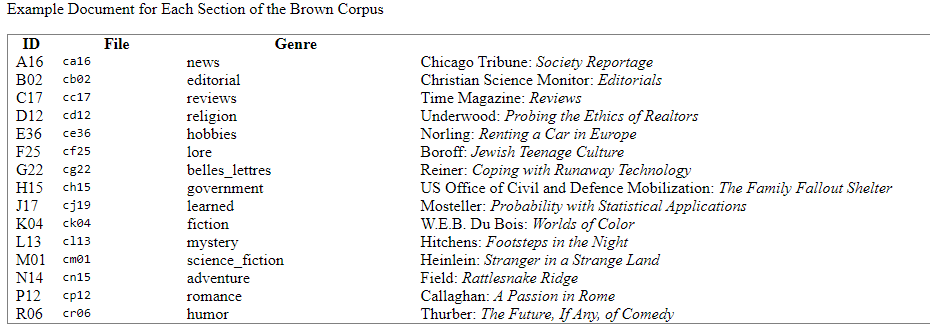

In [31]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [29]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [46]:
print("Words in the whole Corpus : ", len(nltk.corpus.brown.words()))
news_text = nltk.corpus.brown.words(categories='news')
print("Sample Words in the news genre : ",news_text)

Words in the whole Corpus :  1161192
Sample Words in the news genre :  ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [49]:
sents = nltk.corpus.brown.sents()
print("Sentences")
print(sents[0])
print(sents[1])

Sentences
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']


In [38]:
fdist = nltk.FreqDist(w.lower() for w in news_text)
print("Frequency Distributon of News : ", fdist)
sample = ['can', 'could', 'may', 'might', 'must', 'will']
print("\n Frequency Distributon of Sample : ")
for m in sample:
    print(m + ':', fdist[m], end=' ')

Frequency Distributon of News :  <FreqDist with 13112 samples and 100554 outcomes>

 Frequency Distributon of Sample : 
can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [44]:
# Example comparison of Genres in use of certain works like verbs
# Observe most frequent word in our filter is will

cfd = nltk.ConditionalFreqDist((genre, word)
      for genre in nltk.corpus.brown.categories()
      for word in nltk.corpus.brown.words(categories=genre))
genres = ['humor','news', 'religion', 'hobbies', 'science_fiction', 'romance']
modals = ['fun', 'can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  fun   can could   may might  must  will 
          humor     3    16    30     8     8     9    13 
           news     3    93    86    66    38    50   389 
       religion     0    82    59    78    12    54    71 
        hobbies    13   268    58   131    22    83   264 
science_fiction     1    16    49     4    12     8    16 
        romance     1    74   193    11    51    45    43 
          humor     3    16    30     8     8     9    13 


### Stop Words and Unusal Words

In [55]:
nltk.download('stopwords')
stopwords.words('english')[0:10]  #Print few examples

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

### WORDNET - Semantically oriented list, Lemmas
*   WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure.
*   NLTK includes the English WordNet: 155,287 words and 117,659 synonym sets.
*   A synset is a "synonym set" i.e. a collection of synonymous words (or "lemmas"). Examples : The entity car.n.01 is called a

In [63]:
nltk.download('wordnet')
nltk.corpus.wordnet.synsets('motorcar')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[Synset('car.n.01')]

In [65]:
nltk.corpus.wordnet.synset('car.n.01').lemma_names()  #Other meanings for a Motorcar

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [66]:
nltk.corpus.wordnet.synsets('car')  # car has multiple synomouse sets

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [67]:
nltk.corpus.wordnet.synset('car.n.02').lemma_names()

['car', 'railcar', 'railway_car', 'railroad_car']

# NLP EXAMPLE EXERCISE : 1 - SENTIMENT ANALYSIS

We use sample Tweets to perform the analysis.
To use your own dataset, you can gather tweets from a specific time period, user, or hashtag by using the https://developer.twitter.com/en/docs.html

In [ ]:
from nltk.test import *

In [ ]:
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')   #  print all of the tweets within a dataset as strings

## STEP 1 : Tokenzie the data
Here we can use Punkt tokenizer. The punkt module is a pre-trained model that helps you tokenize words and sentences. Works on unsupervised data.

In [ ]:
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')

In [ ]:
print(tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


## Cleaning Data : To be Updated
Use of different text analysis methods may require different preprocessing. Some methods, like keyphrase search, work best when the text is “thoroughly cleaned”; i.e. almost reduced to a “bag of words” [28]. This means that, for instance, words are lemmatized, there is no punctuation, etc. However, some more recent techniques (like text embeddings [29]) can (and should) be trained on a “dirty” text, like Wikipedia [30] dumps or Common Crawl. Hence, it is necessary to distinguish between (at least) two levels of text
cleaning: (A) “delicately cleaned” text (in what follows, called “Stage 1” cleaning), where only parts insignificant to the NLP analysis are removed, and (B) a “very strictly cleaned” text (called “Stage 2”cleaning).

---



### All punctuation, numbers and other non-letter characters were removed, leaving only letters.

### Adposition, adverb, conjunction, coordinating conjunction, determiner, interjection, numeral, particle,
pronoun, punctuation, subordinating conjunction, symbol, end of line, space were removed. Parts of
speech left after filtering were: verbs, nouns, auxiliaries and “other”. The “other” category is usually
tagged for meaningless text, e.g. “asdfgh”. However, these were not deleted in case the algorithm
detected something that was, in fact, important, e.g. domain-specific shortcuts and abbreviations like
CNN, RNN, etc.

### Words have been lemmatized.

## STEP 1 : Normalize the data - Stemming and Lemmatization
*    Like we saw before 'List, Lists, Listing' etc...may mean similar thinkgs but we don't want them to treat as different words.
*    So normailization is used - group together words with the same meaning but different forms.
*    Normalization in NLP is the process of converting a word to its canonical form.
* Explore Two popular techniques : Stemming and Lemmatization



. Stemming, working with only simple verb forms, is a heuristic process that removes the ends of words.

In this tutorial you will use the process of lemmatization, which normalizes a word with the context of vocabulary and morphological analysis of words in text. The lemmatization algorithm analyzes the structure of the word and its context to convert it to a normalized form. Therefore, it comes at a cost of speed. A comparison of stemming and lemmatization ultimately comes down to a trade off between speed and accuracy.

In [ ]:
nltk.download('wordnet')  #wordnet is a lexical database for the English language that helps the script determine the base word.
nltk.download('averaged_perceptron_tagger')  # to determine the context of a word in a sentence.

In [ ]:
# Before running a lemmatizer, you need to determine the context for each word in your text.
# This is achieved by a tagging algorithm, which assesses the relative position of a word in a sentence.

from nltk.tag import pos_tag
from nltk.corpus import twitter_samples

tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
print(pos_tag(tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


From the list of tags, here is the list of the most common items and their meaning:

1.   NNP: Noun, proper, singular
2.   NN: Noun, common, singular or mass
3.   IN: Preposition or conjunction, subordinating
4.   VBG: Verb, gerund or present participle
5.   VBN: Verb, past participle

To incorporate this into a function that normalizes a sentence, you should first generate the tags for each token in the text, and then lemmatize each word using the tag.  
Example : verb being changes to its root form, be, and the noun members changes to member

In [ ]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

In [ ]:
print(lemmatize_sentence(tweet_tokens[0]))

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'be', 'top', 'engage', 'member', 'in', 'my', 'community', 'this', 'week', ':)']


## Step 4 — Removing Noise from the Data

*   Noise is any part of the text that does not add meaning or information to data.
*   Stop words : Example stop words are “is”, “the”, and “a”. They are generally not relevant when processing language, unless a specific use case warrants their inclusion.
*   We use Regular Expressions and leverage a predefined or used function.
Link for more details : https://docs.python.org/3.6/howto/regex.html

*   Examples
**  All hyperlinks in Twitter are converted to the URL shortener t.co. and therefore don't add much value in analysis.
**  Replies:  Twitter handles in certain replies. These Twitter usernames are preceded by a @ symbol. Even these don't help on value from.
**  Punctuation and special characters - While these often provide context to textual data, this context is often difficult to process. For simplicity, you will remove all punctuation and special characters from tweets.



In [ ]:
# LIST OF ALL STOPWORDS IN ENGLISH
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words[:25]

In [ ]:
# Code to remove noise, removes noise and incorporates the normalization and lemmatization.
# Used sample from another site.
import re, string

def fn_Remove_Noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [ ]:
#  function removes all @ mentions, stop words, and converts the words to lowercase
print(fn_Remove_Noise(tweet_tokens[0], stop_words))

['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']


### Clean all the positive and negative tweets

In [ ]:
ositive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(fn_Remove_Noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(fn_Remove_Noise(tokens, stop_words))

In [ ]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


## Step 4 — Word Density, Frequency, Counts etc.

*   Analyze of the frequency of words would be done on all positive tweets.
*   Define a generator function (fn_get_all_words) that takes a list of tweets as an argument to provide a list of words in all of the tweet tokens joined.

In [ ]:
def fn_get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = fn_get_all_words(positive_cleaned_tokens_list)

In [ ]:
freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))     #  lists the words which occur most frequently in the data

# Analyze the output - see emotion or gratitude words etc. like good or thanks etc.

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


## Step 5 — Model Building

*   We can use Naive Bayes classifier in NLTK to perform the modeling.
*   Model requires  list of words in a tweet, and Python dictionary with words as keys and True as values.
*   Prepare data for the Model inputs by Converting Tokens to a Dictionary

In [ ]:
def fn_get_dictionary_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = fn_get_dictionary_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = fn_get_dictionary_tweets_for_model(negative_cleaned_tokens_list)

## TRAIN AND TEST SPLIT OF DATA

In [ ]:
import random
positive_dataset = [(tweet_dict, "Positive")  for tweet_dict in positive_tokens_for_model]
negative_dataset = [(tweet_dict, "Negative")  for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

## Build and Test the Model

In [ ]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.9943333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2061.2 : 1.0
                      :) = True           Positi : Negati =   1665.7 : 1.0
                follower = True           Positi : Negati =     36.9 : 1.0
                     sad = True           Negati : Positi =     35.2 : 1.0
                     bam = True           Positi : Negati =     24.1 : 1.0
                 awesome = True           Positi : Negati =     21.4 : 1.0
                    glad = True           Positi : Negati =     20.0 : 1.0
                     x15 = True           Negati : Positi =     16.7 : 1.0
               community = True           Positi : Negati =     15.3 : 1.0
                 welcome = True           Positi : Negati =     15.0 : 1.0
None


### Analyze the above features.
### What are the discriminating features for Sentiment?

### Analysis of Output
*   Accuracy is defined as the percentage of tweets in the testing dataset for which the model was correctly able to predict the sentiment. A 99.5% accuracy on the test set is pretty good.

In [ ]:
test_tweet1 = "I ordered just from TerribleCo, they didn't deliver properly and screwed up. I never used the app again."
test_tweet2 = "Thank you for sending my baggage to CityX and flying me to CityY at the same time. Brilliant service. #thanksGenericAirline."
test_tweet = test_tweet2

In [ ]:
test_tokens = fn_Remove_Noise(word_tokenize(test_tweet1))
print(classifier.classify(dict([token, True] for token in test_tokens)))

# Named Entity Recognition or NER

*   Named Entity Recognition–NER : NER is about  finding an answer to “the problem of locating and categorizing important nouns and proper nouns, in a text”
*   Automatic methods should facilitate extraction of say named topics, issues, problems, and other “things” mentioned in texts (e.g. in
articles).
*   Library: the spaCy NER model (like **“en-core-web-lg**”) can be used to extract named entities. These entities have been linked by co-occurrence, and visualized as networks.
*   SpaCy is simpler to use, and performed faster relative ot others like Transformers

# NLP Methods
text extraction, text cleaning, text preprocessing, keyword and keyphrase search, text embeddings, abstractive and extractive text summarization, text complexity and other methods such as: clustering, metadata analysis, citation/reference analysis, network visualization.